In [1]:
#!wget https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Grosser_Panda.JPG/640px-Grosser_Panda.JPG
#!wget https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as T
import matplotlib.pyplot as plt

In [3]:
from PIL import Image
from transformers import ConvNextImageProcessor, ConvNextForImageClassification



In [4]:
import json
class_idx = json.load(open("imagenet_class_index.json"))

In [5]:
HFmodel = ConvNextForImageClassification.from_pretrained("facebook/convnext-base-384-22k-1k", cache_dir="./cache").eval()

In [6]:
image_path = '640px-Grosser_Panda.JPG'
image = Image.open(image_path)
#@TODO
torch_original = T....(image)
torch_original = T.Resize([480, 640])(torch_original)

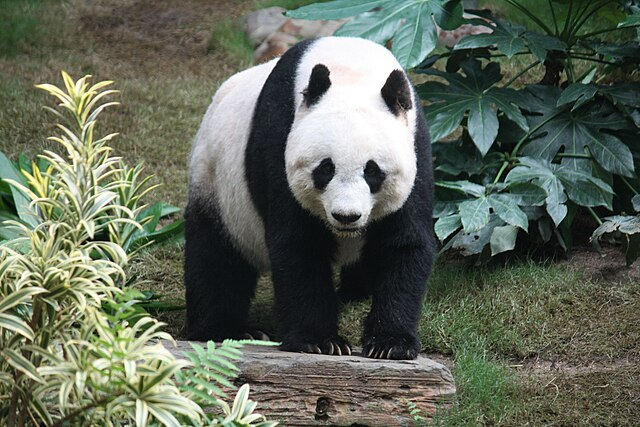

In [7]:
image

In [8]:
#@TODO
HFmodel(torch_original.....logits.....shape

torch.Size([1, 1, 1000])

In [19]:
#@TODO
res = HFmodel(torch_original.....logits
base_prediction = torch....(res).item()
class_name = class_idx[str(base_prediction)]
print(f"The base image prediction id is: {base_prediction}, class: {class_name}")

The base image prediction id is: 388, class: ['n02510455', 'giant_panda']


In [10]:
target_id = 368
ground_truth_id = 388
target_class_name = class_idx[str(target_id)]

In [11]:
print(f"The target prediction id is: {target_id}, class: {target_class_name}")

The target prediction id is: 368, class: ['n02483362', 'gibbon']


In [12]:

#@TODO
def normalize(x, mean=[...], std=[...]):
    n_channels = len(mean)
    ... = torch.tensor(...).reshape(1, n_channels, 1, 1)
    ... = torch.tensor(...).reshape(1, n_channels, 1, 1)
    return (x ...)/...
    



In [13]:
device = "cuda"

In [14]:
#@TODO
images = torch_original.unsqueeze(0)
labels = torch.tensor([ground_truth_id])

images = images.clone().detach().to(device)
labels = labels.clone().detach().to(device)

target_labels = torch.tensor([target_id])
target = torch.zeros(1000)
target[target_id] = 1
target = target.reshape(1,1000)

loss = nn.CrossEntropyLoss()
adv_images = images.clone().detach()

eps = ...
alpha = ...
steps = ...
# Starting at a uniformly random point
adv_images = adv_images + torch.empty_like(adv_images).uniform_(
    -eps, eps
)
adv_images = torch.clamp(adv_images, min=0, max=1).detach()

for _ in range(...):
    adv_images.requires_grad = True
    x = ...(adv_images)
    outputs = model(x).logits
    print(target.shape)
    print(outputs.shape)

    cost = -loss(outputs, target)

    grad = torch.autograd.grad(
        cost, adv_images, retain_graph=False, create_graph=False
    )[0]

    adv_images = adv_images.detach() + ...
    delta = torch....(adv_images - images, min=-eps, max=eps)
    adv_images = torch....(images + delta, min=0, max=1).detach()

torch.Size([1, 1000])
torch.Size([1, 1000])


/home/mwm/repositories/agh/2025/AISEC2025/.venv/lib/python3.10/site-packages/torch/autograd/graph.py:841: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])


In [15]:
#@TODO
logits = model(adv_images).logits
prediction = torch....(logits).item()
message = "CORRECT! Model was pwnd." if target_id==prediction else "Wrong!"
print(f"{message} target:{target_id}, prediction:{prediction}, ground_truth_id was:{ground_truth_id}")

CORRECT! Model was pwnd. target:368, prediction:368, ground_truth_id was:388


Text(0.5, 1.0, "Class: ['n02510455', 'giant_panda']")

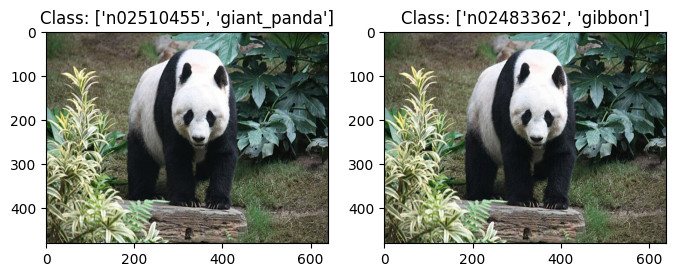

In [16]:
fig, axe = plt.subplots(1,2, figsize = (8,6))

crafted_image = adv_images[0].detach().permute(1,2,0).cpu().numpy()
original_image = torch_original.detach().permute(1,2,0).cpu().numpy()
axe[1].imshow(crafted_image)
crafted_class_name = class_idx[str(prediction)]
axe[1].set_title(f"Class: {crafted_class_name}")
axe[0].imshow(original_image)
axe[0].set_title(f"Class: {class_name}")